# Обучение с учителем. Классификация.

## Логическая регрессия

### Логическая регрессия в SKLEARN

In [2]:
#Загружаем все необходимые библиотеки
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации


import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [3]:
#Прочитаем нашу таблицу
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
display(diabetes_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
#Узнаем размер таблицы
display(diabetes_data.shape)

(757, 8)

<Axes: >

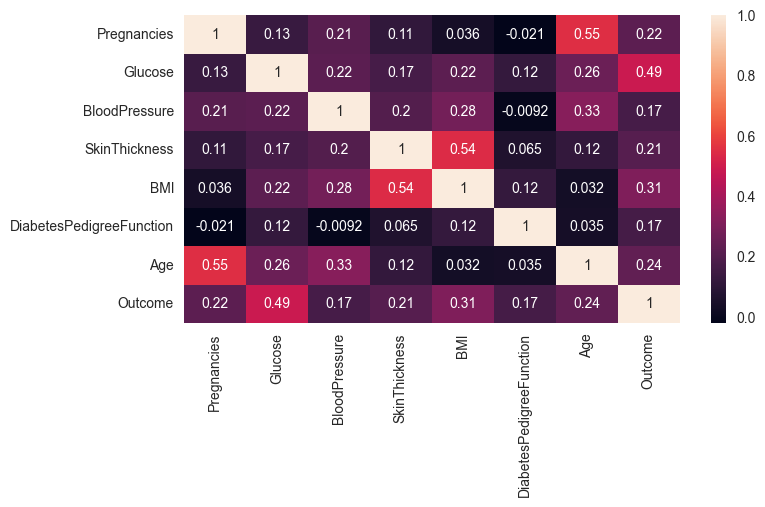

In [5]:
#Строим матрицу корреляции и 
#выбираем наиболее коррелированные с целевым признаком

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(diabetes_data.corr(), annot=True)

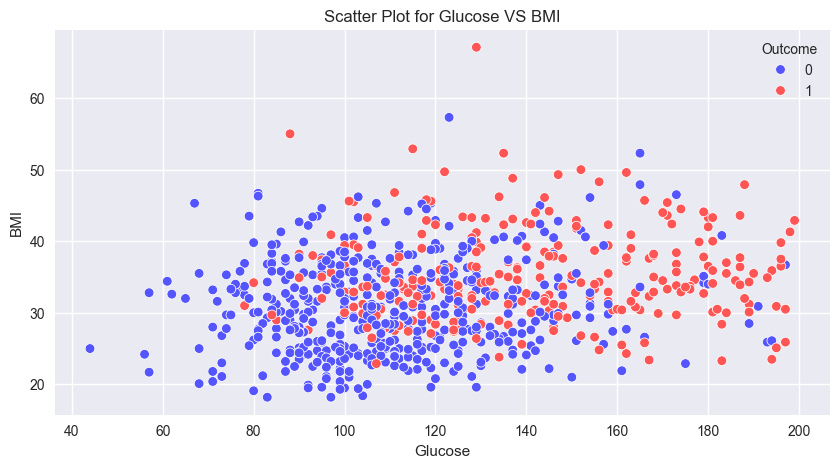

In [6]:
#Построим диаграмму рассеяния по самым коррелированным признакам
#Glucose и BMI

#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 5))
#Строим диаграмму рассеяния
sns.scatterplot(
    #Датасет
    data=diabetes_data,
    #Ось абсцисс
    x='Glucose',
    #Ось ординат
    y='BMI',
    #Группировка
    hue='Outcome',
    #Палитра
    palette='seismic',
    #Координатная плоскость
    ax=ax
);

#Задаем название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

In [7]:
#Пробуем строить разделяющую плоскость с помощью логистической регрессии

#Создаем матрицу наблюдений X и столбец с правильными ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [8]:
#Так как логистическая регрессия - линейная модель,
#загружаем linear_model

from sklearn import linear_model

In [9]:
#Создаем объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)

#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)

#Выводим результирующие коэффициенты
#Свободный член 
print('w0: {}'.format(log_reg_2d.intercept_))
#Остальные параметры модели w1, w2, ..., wm
print('w1, w2: {}'.format(log_reg_2d.coef_))

w0: [-8.24901758]
w1, w2: [[0.03779291 0.08757414]]


In [10]:
#Пример с новым пациентом

#Предсказание вероятности наличия диабета у пациента

#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

Predicted probabilities: [[0.05 0.95]]


In [11]:
#Предсказание класса пациента

#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание класса
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


Данную функцию визуализации модели писал не я. Но ее можно использовать в дальнейшем

In [12]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

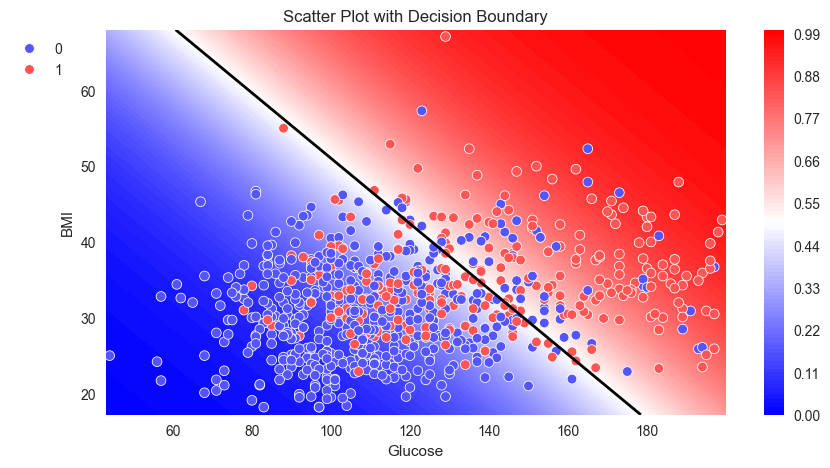

In [13]:
#Вызовем функцию визуализации и посмотрим, 
#как логическая вероятность делит пространсво на две части

plot_probabilities_2d(X, y, log_reg_2d)

In [14]:
#Теперь попробуем использовать 
#всю предоставленную нам информацию для построения модели

#Создаем матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis = 1)
y = diabetes_data['Outcome']

In [15]:
#Создаем объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

In [16]:
#Создадим временную таблицу с предсказанием для наглядности 

#Создадим временную таблицу X
X_temp = X.copy()
#Добавляем в эту таблицу результат предсказания
X_temp['Predicion'] = y_pred
display(X_temp.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Predicion
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


### Задание 2.9

In [17]:
#Загружаем предоставленные данные для задания
task_data = pd.read_csv('data/task_data.csv')
display(task_data)

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0
...,...,...,...,...
95,95,0.531635,-0.479185,1.0
96,96,-0.650192,0.655303,1.0
97,97,0.985299,0.118333,1.0
98,98,-0.275289,0.005730,1.0


In [18]:
#Создаем матрицу признаков X и столбец с ответами y
X_ = task_data.drop(['SNo', 'y'], axis=1)
y_ = task_data['y']

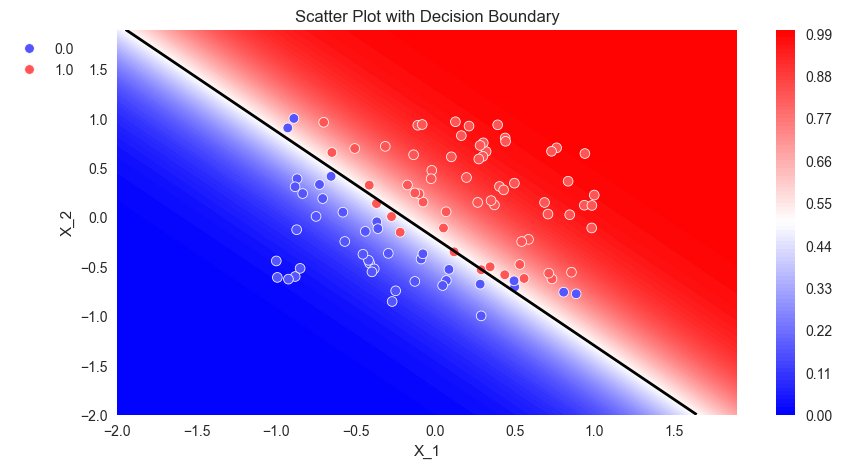

In [19]:
#Создаем объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(solver='sag' ,random_state=42)
#Обучаем модель
log_reg.fit(X_, y_)

#Строим визуализацию
plot_probabilities_2d(X_, y_, log_reg)

## Метрики классификации. Преимущества и недостатки логической регрессии

### Расчет метрик на Python

In [20]:
#Импортируем модуль metrics для расчета метрик
from sklearn import metrics

In [21]:
#Сделаем предсказание наличия диабета для всех пациентов

#Делаем предсказание моделью, обученной на двух признаках 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех признаках 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

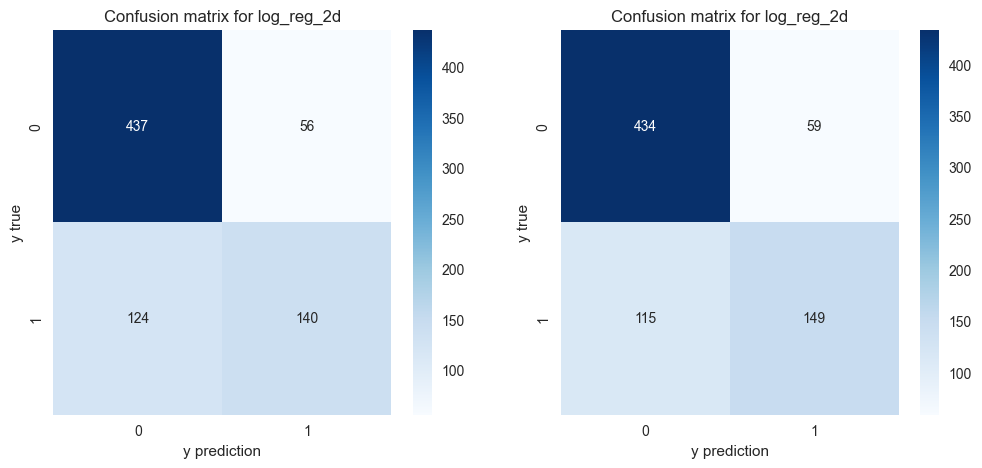

In [22]:
#Построим матрицы ошибок для каждой модели и отобразим их тепловые карты

#Строим матрицы ошибок
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

#Визуализируем матрицы ошибок
#Фигура + 2 координатные плоскости
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

#Строим тепловую карту для второй матрицы
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи аосей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_2d')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

In [23]:
#Расчет метрик для модели log_reg_2d

#Модель log_reg_2d
#Расчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precission
print('Precission: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))

Accuracy: 0.76
Precission: 0.71
Recall: 0.53
F1 score: 0.61


In [24]:
#Расчет метрик для модели log_reg_full

#Модель log_reg_full
#Расчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precission
print('Precission: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))

Accuracy: 0.77
Precission: 0.72
Recall: 0.56
F1 score: 0.63


In [25]:
#Для облегчения можно использовать classification_report
#Она возвращает отчет обо всех метриках классификации

print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [26]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]

#Для удобства завернем numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к калссу 1
    #В противном случае - к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

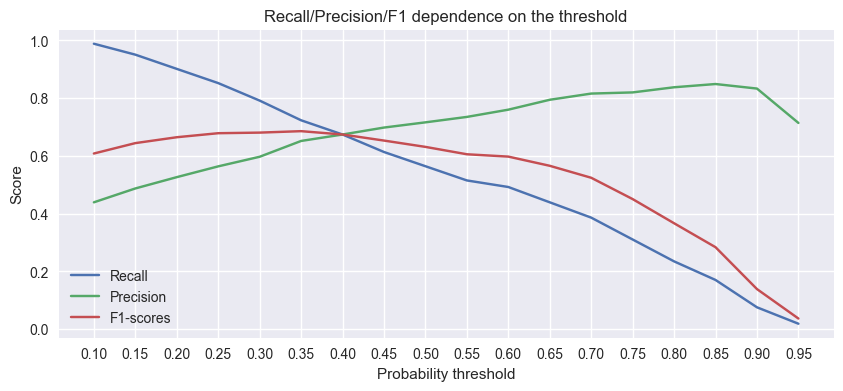

In [27]:
#Построим графики зависимости метрик от порога вероятности

#Визуализируем метрики при различных threshold
#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10, 4))
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precission от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-scores')

#Даем название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds)
#Отображаем легенду
ax.legend();


In [28]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае - к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



### Задание 3.6

In [29]:
#Даны данные, вычислить значение precision
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Precision: {:.2f}'.format(metrics.precision_score(y_true, y_pred)))

Precision: 0.75


### Задание 3.7

In [30]:
#Даны данные, вычислить значение recall
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Precision: {:.2f}'.format(metrics.recall_score(y_true, y_pred)))

Precision: 0.60


### Задание 3.8

In [31]:
#Даны данные, вычислить значение F1
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

print('Precision: {:.2f}'.format(metrics.f1_score(y_true, y_pred)))

Precision: 0.67


## Мультиклассовая классификация

### Мультиклассовая классификация на PYTHON

In [32]:
#Посмотрим как логистическая регрессия решает 
#задачу мультиклассовой классификации

#Возьмем датасет о пингвинах из библиотеки seaborn

penguins_data = sns.load_dataset('penguins')
display(penguins_data.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [33]:
#Посмотрим на пропуски в данных
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [34]:
#Удалим все строки с пропусками
penguins_data = penguins_data.dropna()
penguins_data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [35]:
#Разделим набор данных на матрицу наблюдений и целевой признак

#Матрица наблюдений X
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
display(X.head())

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [36]:
#Воспользуемся функцией get_dummies() для произведения "горячего" кодирования
X_dummies = pd.get_dummies(X)
display(X_dummies)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


In [37]:
#Создаем объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    #Мультиклассовая классификация
    multi_class='multinomial',
    #Количество итераций
    max_iter=1000,
    #Генерация случайных чисел
    random_state=42
)

#Обучаем модель
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание
y_pred = log_reg.predict(X_dummies)

In [38]:
#Создаем DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba,
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)

#Создаем DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred,
    columns=['Predicted Class']
)

#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.78,0.22,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [39]:
#Посмотрим на отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



## Деревья решений

### Процесс построения дерева решений

In [40]:
#Псевдокод рекурсивной функции построения решающего дерева

# def build_decision_tree(X, y):
#     node = Node()
#     if stopping_criterion(X, y) is True:
#         node = create_leaf_with_prediction(y)
# 	return node
#     else:
#         X_left, y_left, X_right, y_right = best_split(X, y)
#         node.left = build_decision_tree(X_left, y_left)
#         node.right = build_decision_tree(X_right, y_right)

### Поиск параметров дерева решений

None

### Деревья решений в Sklearn

In [41]:
#Вновь загрузим данные о диабете
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
display(diabetes_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


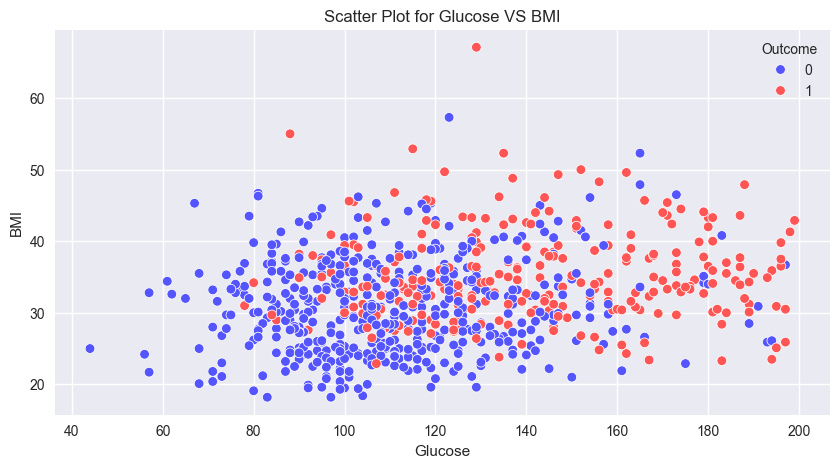

In [43]:
#Построим диаграмму рассеяния с наиболее коррелированных с целевой переменной признаки

#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(10,5))
#Строим диаграмму рассеяния
sns.scatterplot(
    #Датасет
    data = diabetes_data,
    #Ось абсцисс
    x = 'Glucose',
    #Ось ординат
    y = 'BMI',
    #Группировка
    hue='Outcome',
    #Палитра
    palette='seismic',
    #Координатная плоскость
    ax=ax
);
#Задаем название графика
ax.set_title('Scatter Plot for Glucose VS BMI');


In [44]:
#Создадим матрицу наблюдений X и столбец правильных ответов y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [45]:
#Импорт модели деревьев решений в sklearn
from sklearn import tree

In [46]:
#Обучим дерево решений с критерием информативности энтропия Шеннона, 
#максимальной шлубиной = 3 и параметром random_state = 42

#Создаем объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    #Критерий информативности
    criterion='entropy',
    #Максимальная грубина
    max_depth=3,
    #Генератор случайных чисел
    random_state=42
)

#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


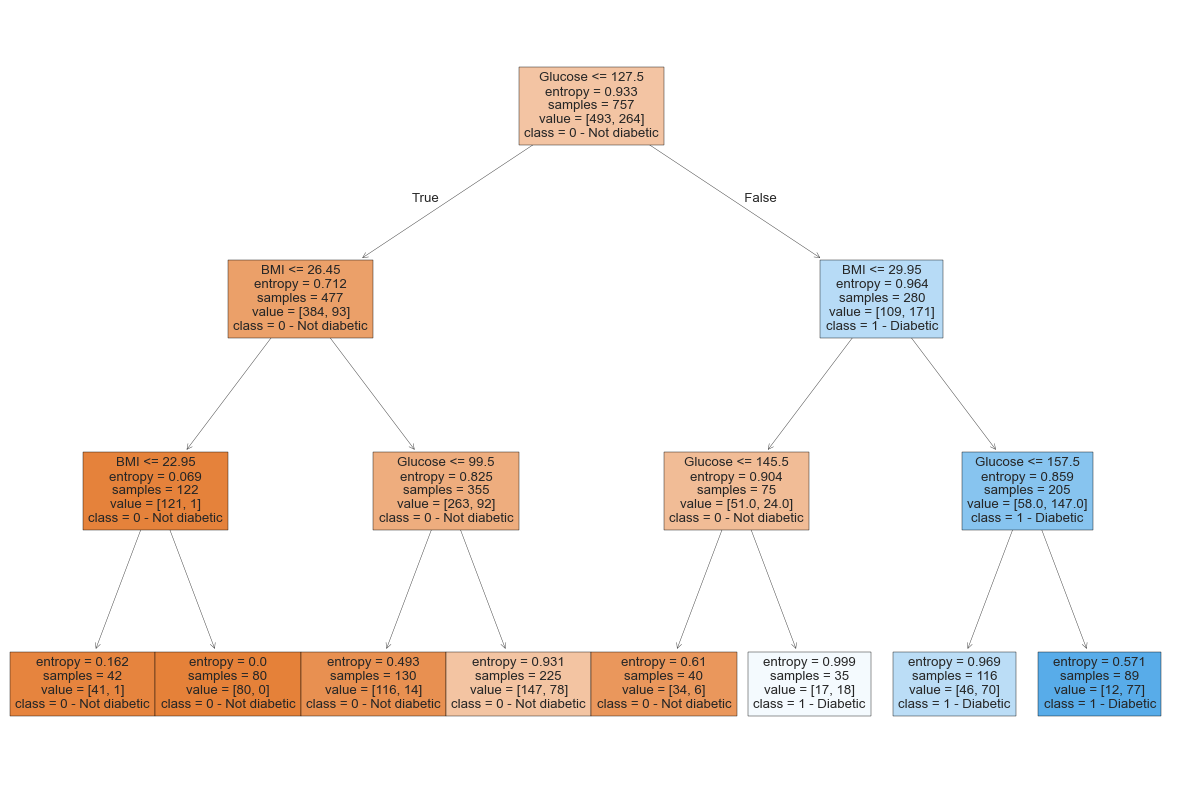

In [48]:
#Создаем функцию для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    #Объект обученного дерева
    dt_clf_2d,
    #Наименования факторов
    feature_names=X.columns,
    #Имена классов
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    #Расцветка графа
    filled=True
);


In [ ]:
#Предсказание класса predict()

#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


In [53]:
#Предсказание вероятности принадлежности к каждому из классов - predict_proba()

#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

Predicted probabilities: [[0.135 0.865]]


In [ ]:
#Посмотрим, как будут выглядеть резделяющая поверхность дерева решений двух признаков

def plot_probabilities_2d(X, y, model):
    #Генерируем координататную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI - от 10 до 80
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

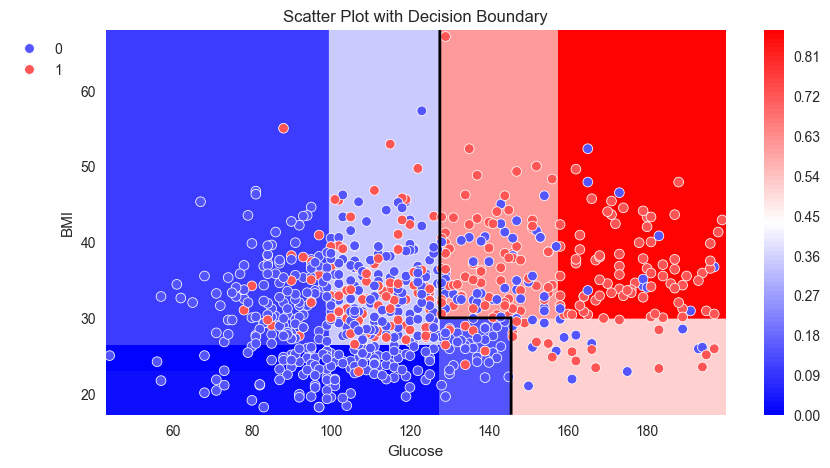

In [54]:
#Вызовем нашу функцию для визуализации
plot_probabilities_2d(X, y, dt_clf_2d)

In [55]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчет о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [56]:
#Построим дерево решений без ограничения максимальной глубины

#Создаем объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    #Критерий информативности
    criterion='entropy',
    #Генератор случайных чисел
    random_state=42
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчет о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



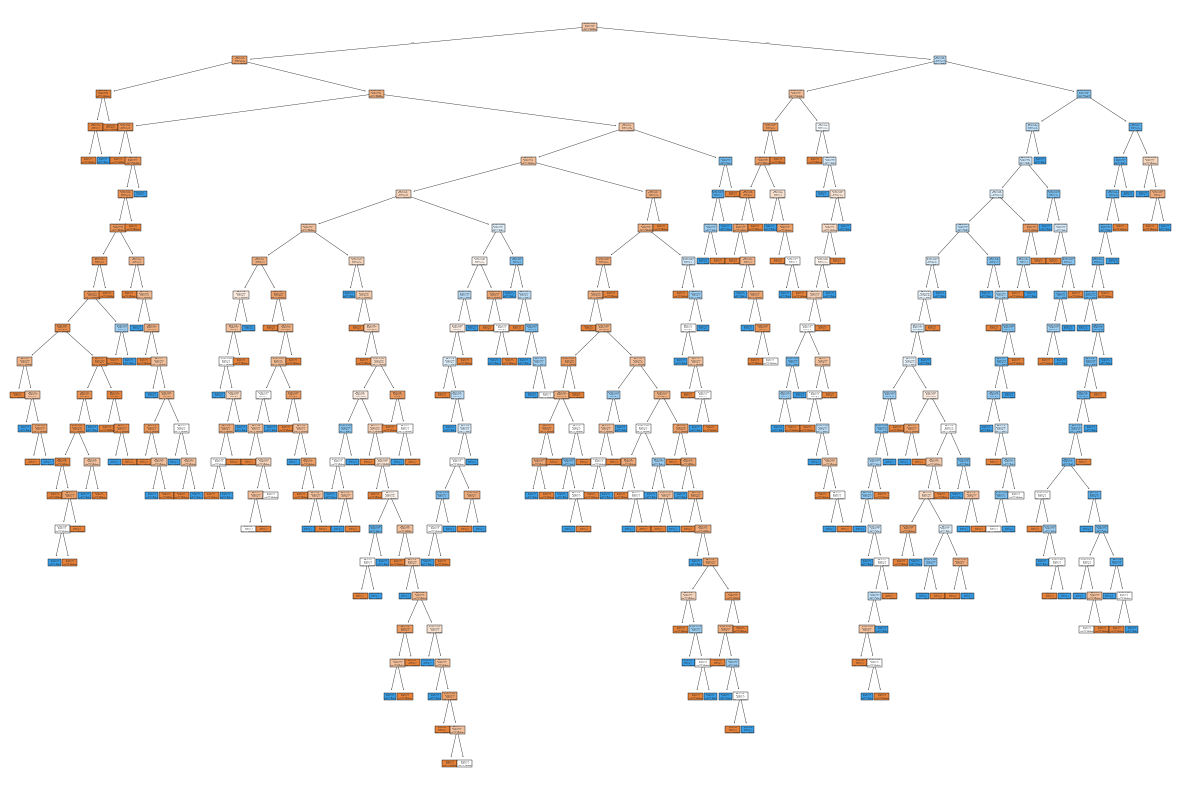

In [58]:
#Визуализируем граф

#Создаем фигуру для визуализации
fig = plt.figure(figsize=(15, 10))
#Строим граф
tree_graph = tree.plot_tree(
    #Объект обученного дерева
    dt_clf_bad,
    #Наименование факторов
    feature_names=X.columns,
    #Имена классов
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    #Расцветка графа
    filled=True
);

In [59]:
#Посмотреть получившуюся глубину дерева можно с помощью метода get_depth()
dt_clf_bad.get_depth()

22

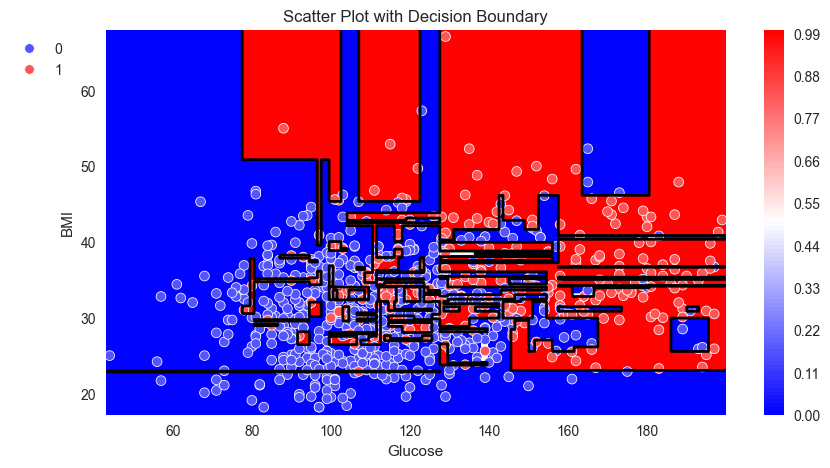

In [60]:
#Посмотрим на разделяющую поверхность
plot_probabilities_2d(X, y, dt_clf_bad)

In [61]:
#Обучим модель на всех признаках

#Создаем матрицу признаков X и столбец с ответами Y 
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [62]:
#Обучаем модель с глубиной 6

#Создаем объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    #Критерий информативности
    criterion='entropy',
    #Максимальная глубина дерева
    max_depth=6,
    #Генератор случайных чисел
    random_state=42
)

#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)

#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



In [63]:
#Дерево решений позволяет определить важность признаков
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


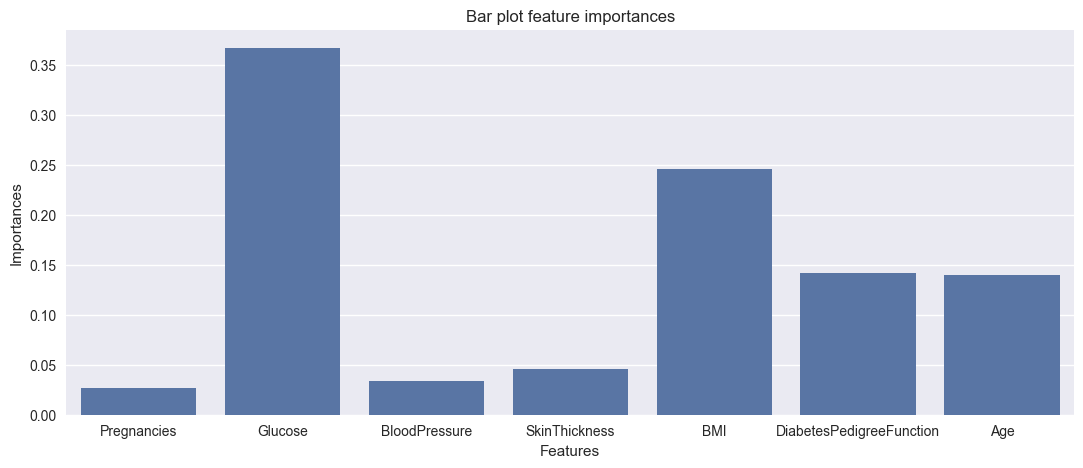

In [64]:
#Для удобства строят столбчатую диаграмму

#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(13, 5))
#Признаки
feature = X.columns
#Важность признаков
feature_importances = dt_clf_full.feature_importances_ 
#Строим столбчатую диаграмму 
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись к графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

### Задание 6.10

In [66]:
dt_clf_full_6_10 = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)
dt_clf_full_6_10.fit(X, y)
y_pred = dt_clf_full_6_10.predict(X)
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred)))

F1 score: 0.78
